In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [12]:
def beta_ev(electron_energy):
    """electron_energy : electron energy in units of eV"""
    return np.sqrt(1.0-1.0/(1+electron_energy/0.510998e6)**2)

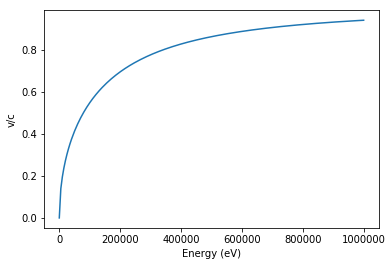

In [13]:
x = np.linspace(0,1e6,num=200)
y = beta_e(x)
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('v/c')
plt.show()

In [14]:
def mckinley_ratio(beta,Z,theta):
    """
    The ratio of differential cross section to Rutherford scattering cross section
    Developed by Mckinley and Feschbach
    Formula adopted from:
    Phys Rev 74 12 (1948)
    beta : Ratio of electron velocity to the speed of light
    Z : Atomic number of the nucleus
    theta : Scattering angle of the electron
    """
    alpha = Z/137 
    sint_2 = np.sin(theta/2)
    return( 1- beta*beta*sint_2*sint_2 +np.pi*alpha*beta*sint_2*(1-sint_2))

In [15]:
def rutherford_xsection(beta,Z,theta):
    """
    Rutherford Cross Section of Electron Scattering
    beta: Ratio of electron velocity to the speed of light
    Z : Atomic number of the nucleus
    theta : Scattering angle of the electron
    """
    sigma = ((Z*0.197e-6)/(2*137*0.510998e6))**2*(1-beta**2)/(beta**4*np.sin(theta/2)**4)
    return sigma #**2*(1-beta**2)/beta**4/np.sin(theta/2)**4



In [16]:
def diff_xsection(beta,Z,theta):
    """
    This function calculates the differential cross section for a given scattering angle 
    The formula adopted from 
    Nanoscale 2013, 5, 6677 Skowron et al
    beta : Ratio of electron velocity to speed of light
    Z : Atomic number of the nucleus
    theta :  Scattering angle of the electron
    """
    return rutherford_xsection(beta,Z,theta)*mckinley_ratio(beta,Z,theta)



In [17]:
def total_xsection(electron_energy,Z, theta_min):
    """Calculates the integral from theta_min to pi
       using trapezoid rule np.trapezoid
       electron_energy : energy of the incident electron in units of eV
       Z : Atomic number of the nucleus
       theta_min : minimum scattering angle of the incident electron
       based on the minimum transferred energy.
       Calls diff_xsection to calculate integral at points theta_min to Pi
    """
    theta = np.linspace(theta_min,np.pi,num=100)
    beta = beta_ev(electron_energy)
    tx = np.trapz(diff_xsection(beta,Z,theta)*np.sin(theta),theta)
    return tx


In [18]:
def transferred_energy(electron_energy,M,theta):
    """
    Transferred energy to Nucleus of mass M from
    the scattered electron scattered with an angle theta
    electron_energy : Energy of the incident electron in units of eV
    M : Mass of the nucleus , atomic units  i.e  mass of carbon 12
    theta : scatte
    """
    e_rest = 0.510998e6 
    m_ratio = M*1822
    temp = 2*electron_energy*(electron_energy+2*e_rest)/ \
    (e_rest*(2+m_ratio+1/m_ratio)+2*electron_energy)
    return temp*np.sin(theta/2)**2


In [19]:
def max_transferred_energy(electron_energy,M):
    """
    Maximum transferred energy to Nucleus of mass M from the electron
    when the scattering angle is equal to Pi
    electron_energy : Energy of the incident electron in units of eV
    M : Mass of the nucleus atomic units
    """
    return transferred_energy(electron_energy,M,np.pi)


In [20]:
def theta_min(electron_energy, M, E_thr):
    """
    Minimum scattering angle for electron scattering
    electron_energy : energy of the incident electron in eV
    M : Mass of the nucleus in atom units
    E_thr : minimal transferred energy for nucleus usually %70-%90 of the 
    calculated threshold energy 
    """
    
    temp = E_thr/max_transferred_energy(electron_energy,M)
    
    try:
        return 2*np.arcsin(np.sqrt(temp))
    except:
        print('Minimum Transferred energy is greater then max transferred energy')
        return None
    

In [21]:
# Calculated Threshold Energy for C : 16.5 eV
# Minimal transferred energy is %70-%90 of this value
electron_energy = 80e3 # 80 keV
M = 12  # 
E_thr = 13 # eV
Z = 26

angle_min = theta_min(electron_energy, M, E_thr)

print('Minimum scattering angle %8.4f in degrees' % (angle_min*180/np.pi))

# Total Cross section
sigma = total_xsection(electron_energy,angle_min,Z)
print(sigma)
print(angle_min)

Minimum scattering angle 130.3656 in degrees
1.1672657562387246e-21
2.2753081413334244


In [22]:
e_energies = np.linspace(70e3,150e3,num=100)

angles = theta_min(e_energies,M,E_thr)
sigmas = []
for e, a in zip(e_energies,angles):
    sigma = total_xsection(e,a,Z)
    sigmas.append(sigma)
sigmas = np.asarray(sigmas)


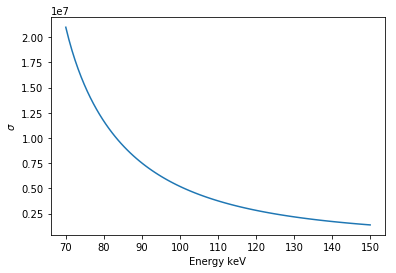

In [23]:
fig, ax = plt.subplots()
ax.plot(e_energies/1000,sigmas*1e28)
ax.set_xlabel('Energy keV')
ax.set_ylabel(r'$\sigma$')
plt.show()

In [25]:
r = mckinley_ratio(beta_ev(2e3),100,angles)
dtheta = diff_xsection(beta_ev(2e3),100,angles)

alpha = (1.6e-19**2)/(6.582e-16*3e8)
rx = rutherford_xsection(beta_ev(2e3),80,angles)
temp =  rutherford_xsection(beta_ev(2e3),80,np.pi/2)
tx = total_xsection(80,12)
Tmax = transferred_energy(80,16,np.pi)
print(tx)
print(temp)
print(Tmax)
print(np.sin(np.pi/2))
Tmin = 10e-3 #keV
theta_min = 2*np.arcsin(np.sqrt(Tmin/Tmax))
print(theta_min*180/np.pi)


TypeError: total_xsection() missing 1 required positional argument: 'theta_min'

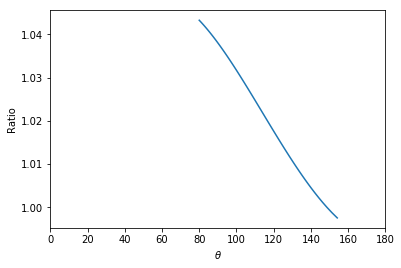

In [26]:
fig, ax = plt.subplots()
ax.plot(angles*180/np.pi,r)
ax.set_ylabel('Ratio')
ax.set_xlabel(r'$\theta$')
ax.set_xlim([0,180])
plt.show()

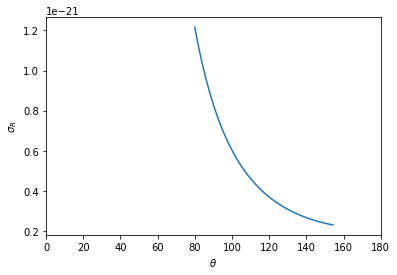

In [27]:
fig, ax = plt.subplots()
ax.plot(angles*180/np.pi,rx)
ax.set_ylabel(r'$\sigma_R$')
ax.set_xlabel(r'$\theta$')
ax.set_xlim([0,180])
plt.show()

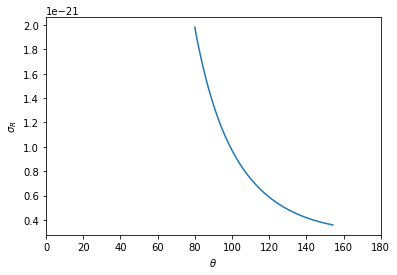

In [28]:
fig, ax = plt.subplots()
ax.plot(angles*180/np.pi,dtheta)
ax.set_ylabel(r'$\sigma_R$')
ax.set_xlabel(r'$\theta$')
ax.set_xlim([0,180])
plt.show()

In [64]:
def T_m(electron_energy,atom_mass):
    mec2 = 0.511e6
    Mc2 = atom_mass*1822.89*mec2
    return 2*electron_energy*(electron_energy+mec2)/Mc2
def coupling(displacement_energy,Z, maximum_transferred_energy,beta):
    g =  maximum_transferred_energy / displacement_energy
    alpha = 1.0/137.0
    temp = g-1-beta**2*np.log(g)
    temp2 = 2*np.sqrt(g)-2-np.log(g)
    temp3 = temp+temp2*np.pi*alpha*beta
    temp4 = (1-beta**2)/beta**4*temp3
    temp5 = np.pi*(Z*0.197e-6*alpha/0.510998e6)**2
    t = np.where(g>1,temp5*temp4,0)
    return t
#    return 4*np.pi*Z**2*temp4*(0.197e-6*137)**2/(0.511e6)**2

In [65]:
atom_mass = 197 # gold atom
Z = 79
Ed = 40 #eV
pozitron_energies = np.linspace(1e6,10e6,num=200)
betas = beta_ev(electron_energy=pozitron_energies)
T_ms = T_m(pozitron_energies,atom_mass)
couplings =coupling(Ed,Z,T_ms,betas)

In [66]:
for e,c in zip(pozitron_energies/1e6,couplings):
    print(e,c/1e-28)

1.0 0.0
1.0452261306532664 0.0
1.0904522613065326 0.0
1.135678391959799 0.0
1.1809045226130652 0.0
1.2261306532663316 0.0
1.271356783919598 0.0
1.3165829145728642 0.0
1.3618090452261307 0.0
1.4070351758793969 0.0
1.4522613065326633 0.0
1.4974874371859297 0.0
1.5427135678391959 0.0
1.5879396984924623 0.0
1.6331658291457287 0.0
1.678391959798995 0.0064735071208798884
1.7236180904522613 0.33644620604853753
1.7688442211055275 0.8097320083785609
1.814070351758794 1.4050734309262296
1.8592964824120604 2.104096165309665
1.9045226130653266 2.8908936132319294
1.949748743718593 3.751676680723877
1.9949748743718592 4.674477640285164
2.0402010050251254 5.648898955185319
2.0854271356783918 6.6658996259348795
2.130653266331658 7.717612955683936
2.1758793969849246 8.797190708773195
2.221105527638191 9.898669508817255
2.2663316582914574 11.016856031514104
2.3115577889447234 12.147228125676625
2.35678391959799 13.285849469555979
2.4020100502512562 14.429295758718048
2.4472361809045227 15.57459074267183

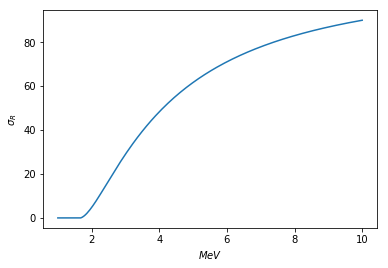

In [67]:
fig, ax = plt.subplots()
ax.plot(pozitron_energies/1e6,couplings/1e-28)
ax.set_ylabel(r'$\sigma_R$')
ax.set_xlabel(r'$MeV$')
plt.show()